In [ ]:
from typing import Generator
def lcg (modulus: int, a: int, c: int, seed: int) -> Generator [int, None, None]:
    while True:
      seed = (a * seed + c) % modulus
      yield seed

print(lcg.__annotations__['return'])

typing.Generator[int, NoneType, NoneType]


    from typing import Generator: Esta línea importa el tipo Generator del módulo typing, que se utilizará para anotar el tipo de retorno de la función lcg.

    def lcg(modulus: int, a: int, c: int, seed: int) -> Generator[int, None, None]:
        def lcg(...): Define la función lcg que toma cuatro parámetros: modulus, a, c, y seed.
        modulus, a, c, y seed son los parámetros necesarios para definir el generador congruencial lineal.
        -> Generator[int, None, None]: Anota el tipo de retorno de la función lcg como un generador que produce enteros (int). Los argumentos entre corchetes especifican los tipos de elementos que genera el generador, el tipo de valor que se envía al generador con send(), y el tipo de valor que se puede devolver con throw() y close(). En este caso, no se espera enviar o devolver valores específicos, por lo que se utiliza None para ambos.

    while True:: Inicia un bucle infinito que genera números pseudoaleatorios continuamente.

    seed = (a * seed + c) % modulus: Calcula el siguiente valor pseudoaleatorio utilizando la fórmula del generador congruencial lineal, donde seed es el valor actual generado, a y c son los parámetros del LCG, y modulus es el módulo.

    yield seed: Retorna el valor generado utilizando yield, lo que convierte la función en un generador. yield pausa la ejecución de la función y devuelve el valor de seed, permitiendo que la función se reanude desde este punto en llamadas posteriores.

    print(lcg.__annotations__['return']): Imprime el tipo de retorno anotado de la función lcg. Accede al diccionario de anotaciones de la función (__annotations__) y extrae el tipo de retorno utilizando la clave 'return'. Esto imprime Generator[int, None, None], que es la anotación de tipo que especifica que la función es un generador que produce enteros.

In [ ]:
# llamamos el generador para unos valores concretos repetidas veces
a = lcg (31,3,0,1)

# m=2**32 a=22695477 c=1

print ( next ( a ))
print ( next ( a ))
print ( next ( a ))
print ( next ( a ))
print ( next ( a ))

3
9
27
19
26


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def discrete_inverse_trans(prob_vec):
    U=uniform.rvs(size=1)
    if U<=prob_vec[0]:
        return 1
    else:
        for i in range(1,len(prob_vec)+1):
            if sum(prob_vec[0:i])<U and sum(prob_vec[0:i+1])>U:
                return i+1

def discrete_samples(prob_vec, n=1):
    prob_vec = [0 if p is None else p for p in prob_vec]

    sample = []
    for i in range(0, n):
        sample.append(discrete_inverse_trans(prob_vec))
    return np.array(sample)

def discrete_simulate(prob_vec, numbers, n=1):
    # Replace None values with zeros
    prob_vec = [0 if p is None else p for p in prob_vec]

    prob_vec /= np.sum(prob_vec)

    sample_disc = discrete_samples(prob_vec, n)
    unique, counts = np.unique(sample_disc, return_counts=True)

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    prob = counts / n
    ax.bar(numbers, prob)
    ax.set_title("muestreo de la pdf original %i" % n)
    plt.show()

    return

    Función discrete_inverse_trans(prob_vec):
        Esta función implementa el método de transformación inversa para generar variables aleatorias discretas.
        Genera una variable aleatoria uniforme continua entre 0 y 1 utilizando uniform.rvs(size=1) de la biblioteca scipy.stats.
        Luego, compara la variable aleatoria generada con las probabilidades acumuladas en el vector prob_vec para determinar qué valor discreto debe generarse.
        Retorna el valor discreto generado.

            U = uniform.rvs(size=1): Genera una muestra aleatoria de una distribución uniforme entre 0 y 1 utilizando la función rvs del generador de números aleatorios uniformes uniform.

            if U <= prob_vec[0]: return 1: Comprueba si la muestra aleatoria U es menor o igual que la primera probabilidad en prob_vec. Si es así, devuelve el primer valor posible de la distribución discreta, que es 1.

            for i in range(1, len(prob_vec)+1):: Itera sobre el rango de 1 hasta la longitud del vector de probabilidades prob_vec más 1.

            if sum(prob_vec[0:i]) < U and sum(prob_vec[0:i+1]) > U: return i + 1: En cada iteración, compara la suma acumulada de las probabilidades hasta el índice i con la muestra aleatoria U. Si U está entre la suma acumulada hasta i y la suma acumulada hasta i+1, devuelve i + 1. Esto significa que i + 1 es el primer valor posible de la distribución discreta para el cual la suma acumulada de probabilidades supera la muestra aleatoria U.

    Función discrete_samples(prob_vec, n=1):
        Esta función genera muestras de variables aleatorias discretas llamando repetidamente a discrete_inverse_trans(prob_vec) y almacenando los resultados en una lista.
        El argumento n especifica cuántas muestras se deben generar, y por defecto es 1.
        Retorna las muestras como un array de NumPy.

            sample = []: Inicializa una lista vacía llamada sample para almacenar las muestras generadas.

            for i in range(0, n):: Itera n veces para generar n muestras de la distribución discreta.

            sample.append(discrete_inverse_trans(prob_vec)): En cada iteración, llama a la función discrete_inverse_trans(prob_vec) para generar una muestra de la distribución discreta y la agrega a la lista sample.

            return np.array(sample): Convierte la lista de muestras en un array NumPy y lo devuelve como resultado de la función.

    Función discrete_simulate(prob_vec, numbers, n=1):
        Esta función simula y visualiza variables aleatorias discretas.
        Utiliza discrete_samples() para generar las muestras de variables aleatorias discretas.
        Calcula la frecuencia de ocurrencia de cada valor discreto en las muestras generadas.
        Utiliza la biblioteca matplotlib para crear un gráfico de barras que muestra la distribución de probabilidad estimada.
        El argumento numbers proporciona los valores discretos asociados a las probabilidades en prob_vec.
        Muestra el gráfico de barras y retorna None.

            sample_disc = discrete_samples(prob_vec, n): Llama a la función discrete_samples(prob_vec, n) para generar una muestra de tamaño n de la distribución discreta representada por el vector de probabilidades prob_vec.

            unique, counts = np.unique(sample_disc, return_counts=True): Utiliza la función np.unique() para encontrar los valores únicos en la muestra generada (sample_disc) y contar cuántas veces aparece cada valor. unique contiene los valores únicos y counts contiene las frecuencias correspondientes.

            fig = plt.figure(): Crea una nueva figura de matplotlib.

            ax = fig.add_axes([0, 0, 1, 1]): Agrega un eje a la figura. Los cuatro números [0, 0, 1, 1] especifican las coordenadas de la esquina inferior izquierda del eje y su ancho y altura, respectivamente.

            prob = counts / n: Calcula la frecuencia relativa de cada valor único dividiendo el número de ocurrencias de cada valor (counts) por el tamaño de la muestra (n). Esto proporciona una estimación de la probabilidad de cada valor.

            ax.bar(numbers, prob): Crea un gráfico de barras donde numbers son los valores únicos y prob son las frecuencias relativas correspondientes. Esto muestra la distribución de la muestra generada.

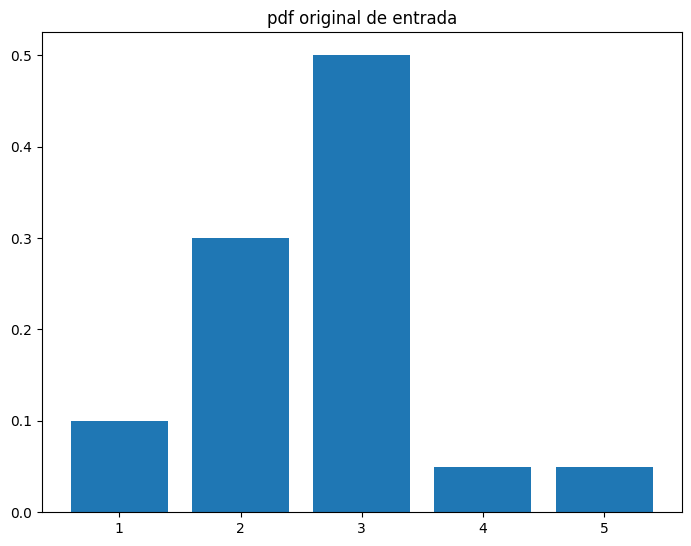

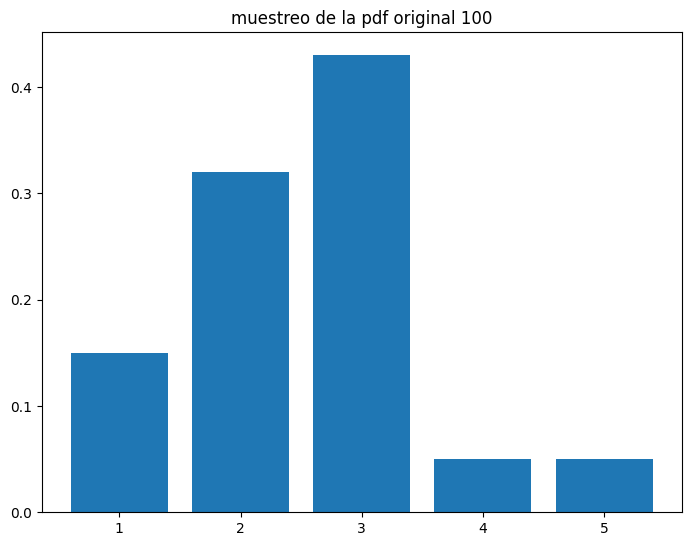

In [ ]:
#cojamos un ejemplo de una funcion de probabilidad
prob_vec=np.array([0.1,0.3,0.5,0.05,0.05])
numbers=np.array([1,2,3,4,5])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(numbers, prob_vec)
ax.set_title("pdf original de entrada")
plt.show()

#y veamos qué tal muestreamos esa función con distinto numero n
dis_example3=discrete_simulate(prob_vec, numbers, n=100)

In [ ]:

def normal_density(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def lognormal_density(x, sigma):
    mu = -0.5 * sigma ** 2
    x_prime = np.log(1 + x)
    return normal_density(x_prime, mu, sigma) / (x + 1)


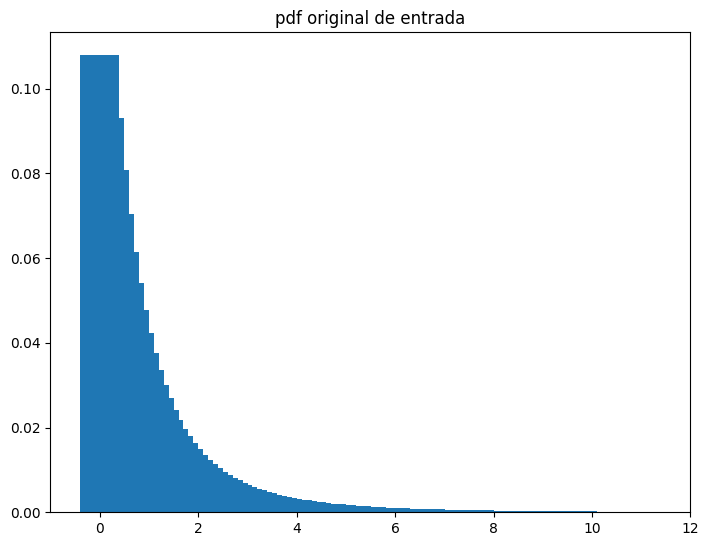

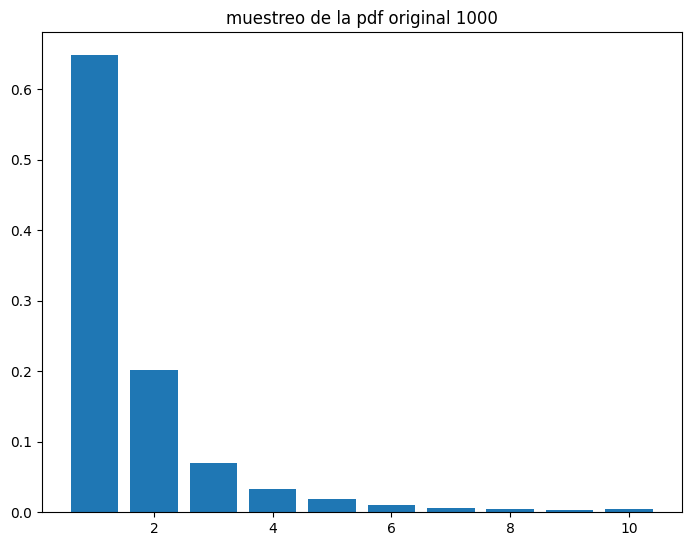

In [ ]:
sigma = 1.

x_values = np.linspace(0, 100, 1000)

pdf_values = lognormal_density(x_values, sigma)

pdf_values /= np.sum(pdf_values)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, pdf_values)
ax.set_title("pdf original de entrada")
ax.set_xlim(-1, 12)
plt.show()

num_intervals = 10
intervals = np.linspace(0, 10, num_intervals + 1)

probabilities = []
for i in range(num_intervals):
    interval_prob = np.trapz(pdf_values[(x_values >= intervals[i]) & (x_values < intervals[i+1])],
                             x_values[(x_values >= intervals[i]) & (x_values < intervals[i+1])])
    if np.isnan(interval_prob):
        probabilities.append(0)
    else:
        probabilities.append(interval_prob)

numbers = np.arange(1, num_intervals + 1)
discrete_simulate(probabilities, numbers, n=1000)


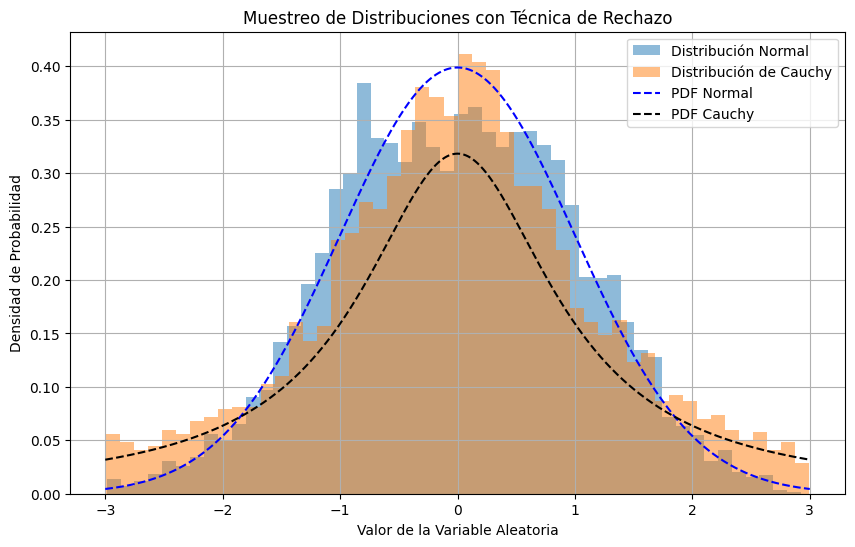

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de densidad de probabilidad (PDF) de la distribución normal estándar
def normal_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Función de densidad de probabilidad (PDF) de la distribución de Cauchy
def cauchy_pdf(x):
    return 1 / (np.pi * (1 + x**2))

M = 0.3  # Factor de escala
N = 10000  # Número de muestras a generar

# Generar muestras uniformemente distribuidas en el rango [-3, 3]
u1 = np.random.rand(N) * 6 - 3
u2 = np.random.rand(N)

# Aplicar la técnica de rechazo para la distribución normal
idx_normal = np.where(u2 <= normal_pdf(u1) / M)
v_normal = u1[idx_normal]

# Aplicar la técnica de rechazo para la distribución de Cauchy
idx_cauchy = np.where(u2 <= cauchy_pdf(u1) / M)
v_cauchy = u1[idx_cauchy]

# Generar muestras de la distribución normal estándar
v_normal_dist = np.random.normal(0, 1, size=idx_normal[0].shape)

# Ajustar el tamaño de u2
un2 = u2[:len(v_normal_dist)]

# Aplicar la técnica de rechazo para la distribución de Cauchy utilizando la normal estándar
idx_cauchy_normal = np.where(un2 <= cauchy_pdf(v_normal_dist) / M)
v_cauchy_normal = v_normal_dist[idx_cauchy_normal]

# Crear histogramas para visualizar el muestreo
plt.figure(figsize=(10, 6))

# Histograma para la distribución normal
plt.hist(v_normal, bins=50, density=True, alpha=0.5, label='Distribución Normal')

# Histograma para la distribución de Cauchy
plt.hist(v_cauchy, bins=50, density=True, alpha=0.5, label='Distribución de Cauchy')

#plt.hist(v_cauchy_normal, bins=50, density=True, alpha=0.5, label='Distribución de Cauchy')


# Graficar la función de densidad de probabilidad (PDF) de las distribuciones
x_values = np.linspace(-3, 3, 1000)
plt.plot(x_values, normal_pdf(x_values), color='blue', linestyle='--', label='PDF Normal')
plt.plot(x_values, cauchy_pdf(x_values), color='k', linestyle='--', label='PDF Cauchy')

x_values = np.linspace(-3, 3, N)

#plt.plot(x_values, u2, color='red', linestyle=':', label='PDF Cauchy')



plt.title('Muestreo de Distribuciones con Técnica de Rechazo')
plt.xlabel('Valor de la Variable Aleatoria')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


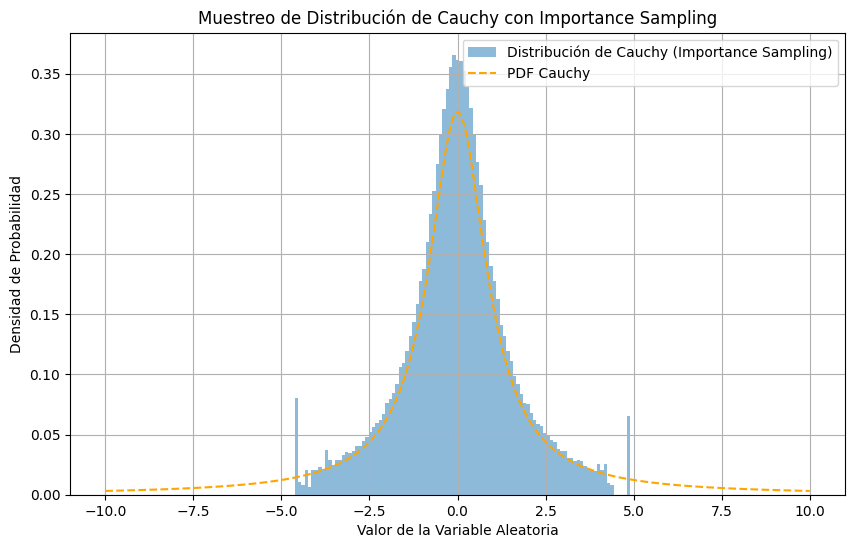

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de densidad de probabilidad (PDF) de la distribución normal estándar
def normal_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Función de densidad de probabilidad (PDF) de la distribución de Cauchy
def cauchy_pdf(x):
    return 1 / (np.pi * (1 + x**2))

N = 1000000  # Número de muestras

# Generar muestras de la distribución normal estándar
normal_samples = np.random.normal(0, 1, N)

# Calcular los pesos utilizando el método de importancia
weights = cauchy_pdf(normal_samples) / normal_pdf(normal_samples)

# Normalizar los pesos
weights /= np.sum(weights)

# Utilizar las muestras con pesos para generar muestras ponderadas
cauchy_samples = np.random.choice(normal_samples, size=N, p=weights)

plt.figure(figsize=(10, 6))

# Histograma para las muestras generadas con importancia sampling
plt.hist(cauchy_samples, bins=100, density=True, alpha=0.5, label='Distribución de Cauchy (Importance Sampling)')

# Graficar la función de densidad de probabilidad (PDF) de la distribución de Cauchy
x_values = np.linspace(-10, 10, 1000)
plt.plot(x_values, cauchy_pdf(x_values), color='orange', linestyle='--', label='PDF Cauchy')

plt.title('Muestreo de Distribución de Cauchy con Importance Sampling')
plt.xlabel('Valor de la Variable Aleatoria')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Calcular y graficar las distribuciones de Poisson y sus distribuciones gaussianas correspondientes.

Para la distribución de Poisson con $\lambda = 1.69$, la PMF se calcula como:

$f(k; 1.69) = \frac{{1.69^k e^{-1.69}}}{{k!}}$

Y para la distribución de Poisson con $\lambda = 11.48$, la PMF se calcula como:

$f(k; 11.48) = \frac{{11.48^k e^{-11.48}}}{{k!}}$

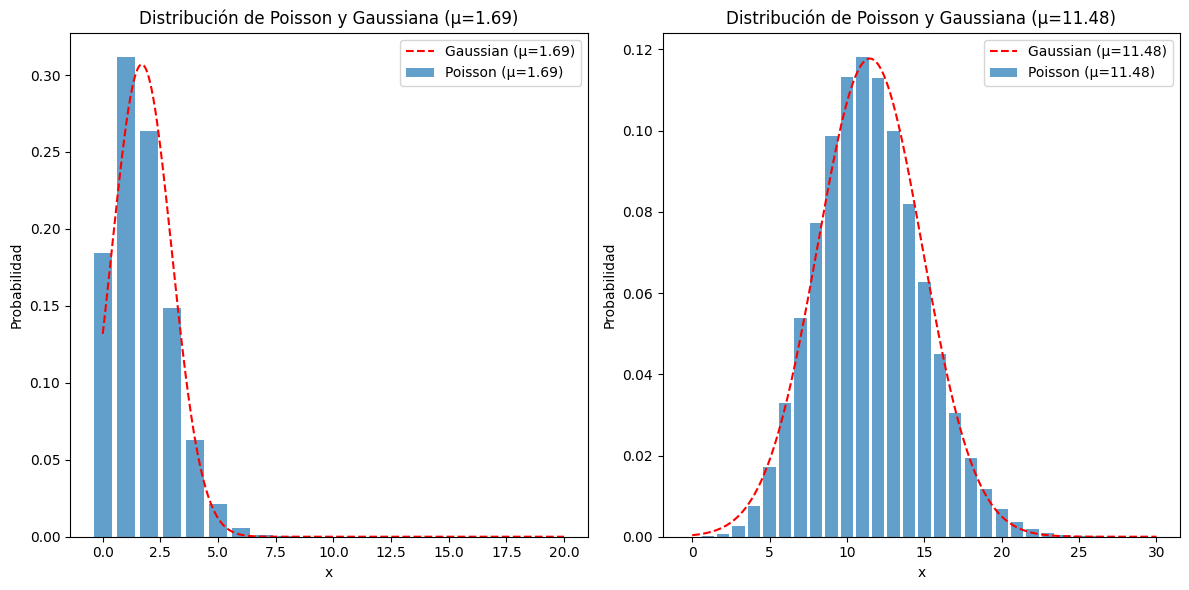

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Parámetros de las distribuciones de Poisson
mu_a = 1.69
mu_b = 11.48

# Valores de x para evaluar las distribuciones
x_values_a = np.arange(0, 20)
x_values_b = np.arange(0, 30)

# Evaluar las distribuciones de Poisson
poisson_values_a = poisson.pmf(x_values_a, mu_a)
poisson_values_b = poisson.pmf(x_values_b, mu_b)

# Calcular los parámetros de la distribución gaussiana
sigma_a = np.sqrt(mu_a)
sigma_b = np.sqrt(mu_b)

# Valores de x para evaluar las distribuciones gaussianas
x_values_gaussian_a = np.linspace(0, 20, 1000)
x_values_gaussian_b = np.linspace(0, 30, 1000)

# Evaluar las distribuciones gaussianas
gaussian_values_a = norm.pdf(x_values_gaussian_a, mu_a, sigma_a)
gaussian_values_b = norm.pdf(x_values_gaussian_b, mu_b, sigma_b)

# Graficar las distribuciones de Poisson y Gaussianas
plt.figure(figsize=(12, 6))

# Graficar la distribución de Poisson y Gaussiana para mu = 1.69
plt.subplot(1, 2, 1)
plt.bar(x_values_a, poisson_values_a, label='Poisson (μ=1.69)', alpha=0.7)
plt.plot(x_values_gaussian_a, gaussian_values_a, color='red', linestyle='--', label='Gaussian (μ=1.69)')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson y Gaussiana (μ=1.69)')
plt.legend()

# Graficar la distribución de Poisson y Gaussiana para mu = 11.48
plt.subplot(1, 2, 2)
plt.bar(x_values_b, poisson_values_b, label='Poisson (μ=11.48)', alpha=0.7)
plt.plot(x_values_gaussian_b, gaussian_values_b, color='red', linestyle='--', label='Gaussian (μ=11.48)')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson y Gaussiana (μ=11.48)')
plt.legend()

plt.tight_layout()
plt.show()
